# The Titanic Dataset

## General Overview

In [1]:
library(tidyverse)
library(caret)
library(corrplot)
options(repr.plot.width=4, repr.plot.height=3)

df <- read_csv("train.csv")
glimpse(df)

Warning message:
"package 'tidyverse' was built under R version 3.6.1"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'caret' was built under R version 3.6.1"Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

Warning message:
"package 'corrplot' was built under R version 3.6.2"corrplot 0.84 loaded
Parsed with column specification:
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = 

Observations: 891
Variables: 12
$ PassengerId <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, ...
$ Survived    <dbl> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0...
$ Pclass      <dbl> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3...
$ Name        <chr> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley ...
$ Sex         <chr> "male", "female", "female", "female", "male", "male", "...
$ Age         <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39, 1...
$ SibSp       <dbl> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1...
$ Parch       <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0...
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", ...
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.86...
$ Cabin       <chr> NA, "C85", NA, "C123", NA, NA, "E46", NA, NA, NA, "G6",...
$ Embarked    <chr> "S", "C", "S", "S", "S", "Q", "S", "S", "S", "C", "S", ...


Convert variables that are obvious factors. 

In [2]:
df <- df %>%
  mutate(Pclass = factor(Pclass),
         Sex = factor(Sex),
         Embarked = factor(Embarked),
         Survived = factor(Survived)
        )

Display missing values in the dataset

In [3]:
map_dbl(df, ~sum(is.na(.x)))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0         687           2

Cabin and age have a significant amount of missing observations. Check zero variance variables, i.e. ones that have almost no information. 

In [4]:
print(nearZeroVar(df))

integer(0)


Correlations of continuous predictors without missing observations.

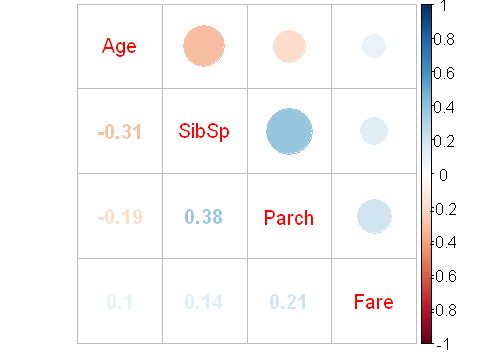

In [5]:
correlations <- cor(df %>% 
                      select(Age, SibSp, Parch, Fare) %>%
                       filter(!is.na(Age)))
corrplot.mixed(correlations)

There is no correlation with a larger magnitude than $\frac{1}{2}$, so there is no need to eliminate a predictor. 

## Target Value: Survived

In [6]:
sum(is.na(df$Survived))

[1] 0

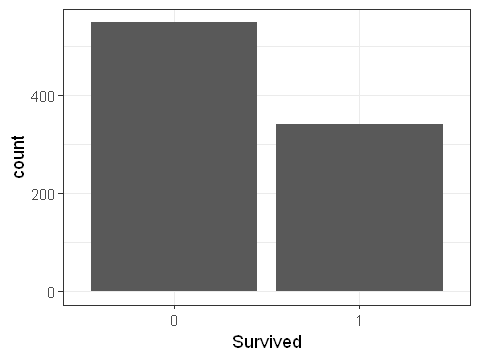

In [7]:
ggplot(df, aes(Survived)) + 
  geom_bar() +
  theme_bw()

In [8]:
prop.table(table(df$Survived))


        0         1 
0.6161616 0.3838384 

I say that the dataset is balanced.

## Categorial Predictors
### Sex

female   male 
   314    577

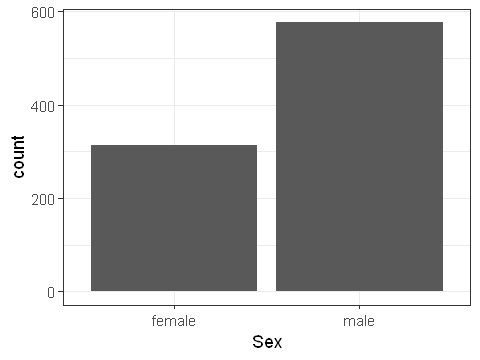

In [9]:
summary(df$Sex)

ggplot(df, aes(Sex)) + 
  geom_bar() +
  theme_bw()

        
           0   1
  female  81 233
  male   468 109

        
            0    1
  female 0.26 0.74
  male   0.81 0.19

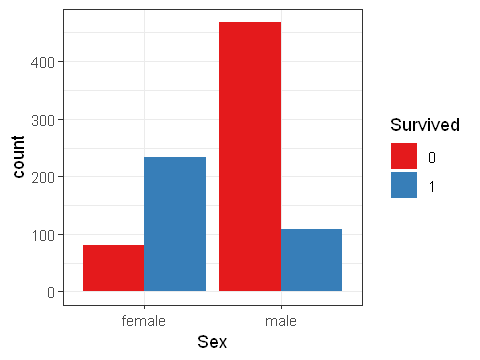

In [22]:
(table_absolute <- table(df$Sex, df$Survived))
round((table_relative <- prop.table(table_absolute, 1)), 2)

ggplot(df, aes(x = Sex, fill = Survived)) + 
   geom_bar(position=position_dodge()) +
scale_fill_brewer(palette="Set1")+
  theme_bw()

In [28]:
prop.test(table_absolute)


	2-sample test for equality of proportions with continuity correction

data:  table_absolute
X-squared = 260.72, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.6135708 -0.4926894
sample estimates:
   prop 1    prop 2 
0.2579618 0.8110919 


### Pclass

1   2   3 
216 184 491

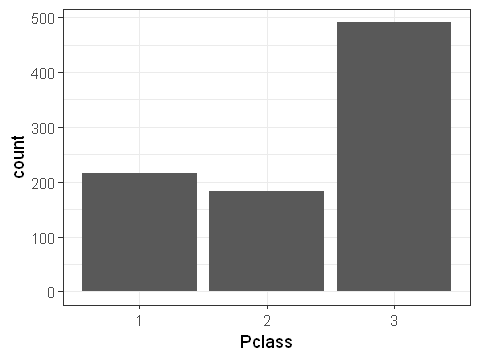

In [32]:
summary(df$Pclass)

ggplot(df, aes(Pclass)) + 
  geom_bar() +
  theme_bw()

   
      0   1
  1  80 136
  2  97  87
  3 372 119

   
       0    1
  1 0.37 0.63
  2 0.53 0.47
  3 0.76 0.24

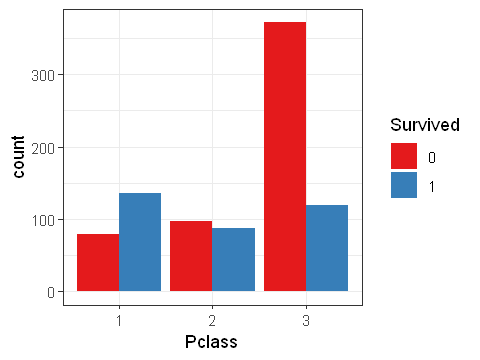

In [34]:
(table_absolute <- table(df$Pclass, df$Survived))
round((table_relative <- prop.table(table_absolute, 1)), 2)

ggplot(df, aes(x = Pclass, fill = Survived)) + 
   geom_bar(position=position_dodge()) +
scale_fill_brewer(palette="Set1")+
  theme_bw()

In [36]:
prop.test(table_absolute)


	3-sample test for equality of proportions without continuity
	correction

data:  table_absolute
X-squared = 102.89, df = 2, p-value < 2.2e-16
alternative hypothesis: two.sided
sample estimates:
   prop 1    prop 2    prop 3 
0.3703704 0.5271739 0.7576375 


## Continuous Predictors
### Fare